In [562]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [563]:
boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [564]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['target'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

Text(0.5, 1.0, 'boston boxenplot')

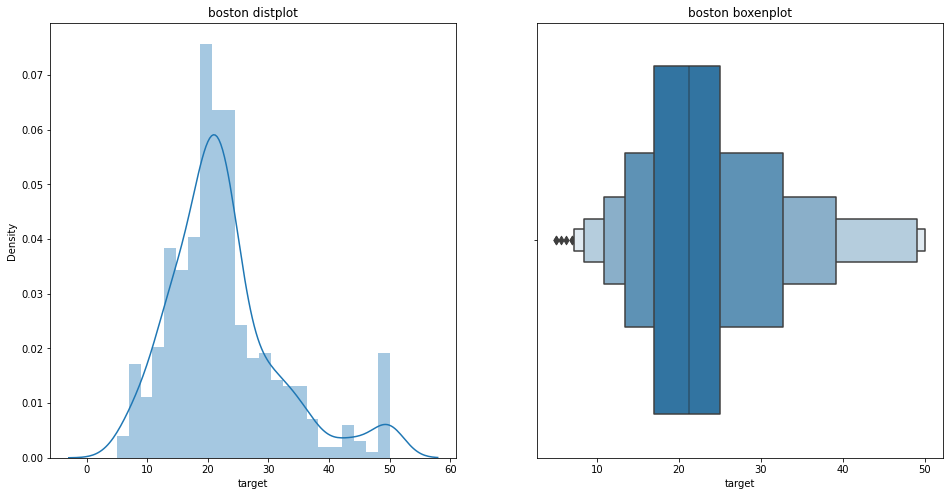

In [565]:
# 종속변수 확인해 보기
# 정규분포를 비슷하게 따르는 것으로 보인다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['target'], ax = ax[0])
sns.boxenplot(data['target'], ax = ax[1])
ax[0].set_title('boston distplot')
ax[1].set_title('boston boxenplot')

Text(0.5, 1.0, 'boston boxenplot')

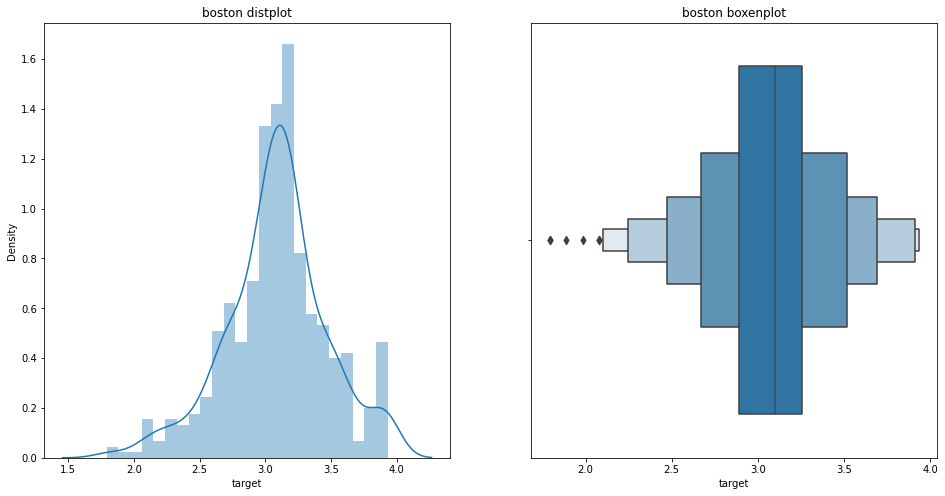

In [566]:
# target변수에 log화를 씌워서 분포를 비교해 본다.
data['target'] = data['target'].apply(lambda x:np.log1p(x))

# 다시 분포를 통해 확인해 본다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['target'], ax = ax[0])
sns.boxenplot(data['target'], ax = ax[1])
ax[0].set_title('boston distplot')
ax[1].set_title('boston boxenplot')

# 아까보다 정규분포를 더 많이 따르는 것으로 확인했고 로그를 씌운 target을 사용하도록 하자.

In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Text(0.5, 1.0, 'CRIM vs Target scatterplot')

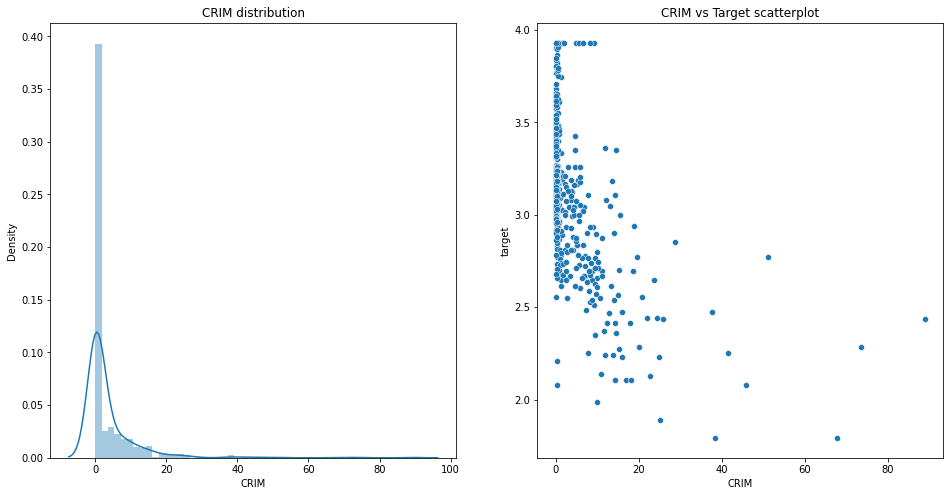

In [568]:
# CRIM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['CRIM'], ax = ax[0])
sns.scatterplot(data = data, x = 'CRIM', y = 'target', ax = ax[1])
ax[0].set_title('CRIM distribution')
ax[1].set_title('CRIM vs Target scatterplot')

In [569]:
# CRIM은 0에 몰려있기 때문에 정규화를 통해서 분석을 진행해 보자.
data['CRIM'] = data['CRIM'].apply(lambda x:np.log1p(x))

Text(0.5, 1.0, 'CRIM vs Target scatterplot')

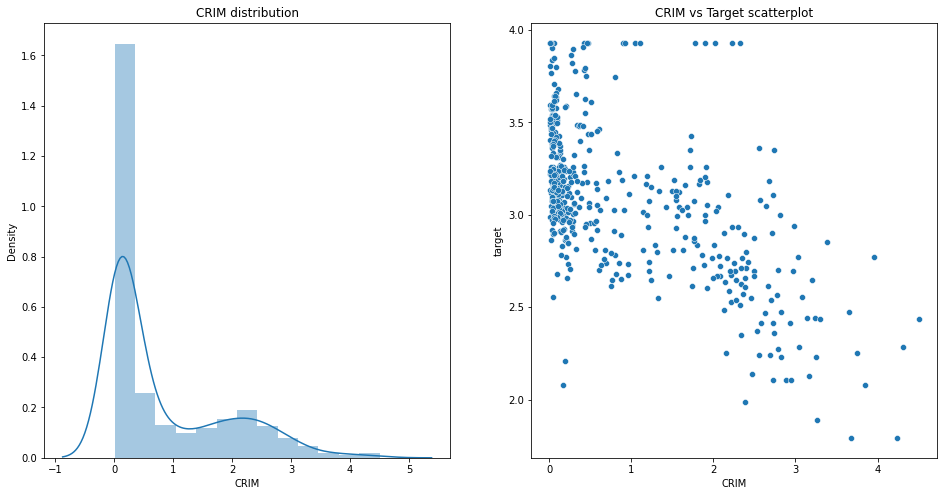

In [570]:
# CRIM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['CRIM'], ax = ax[0])
sns.scatterplot(data = data, x = 'CRIM', y = 'target', ax = ax[1])
ax[0].set_title('CRIM distribution')
ax[1].set_title('CRIM vs Target scatterplot')

Text(0.5, 1.0, 'ZN vs Target scatterplot')

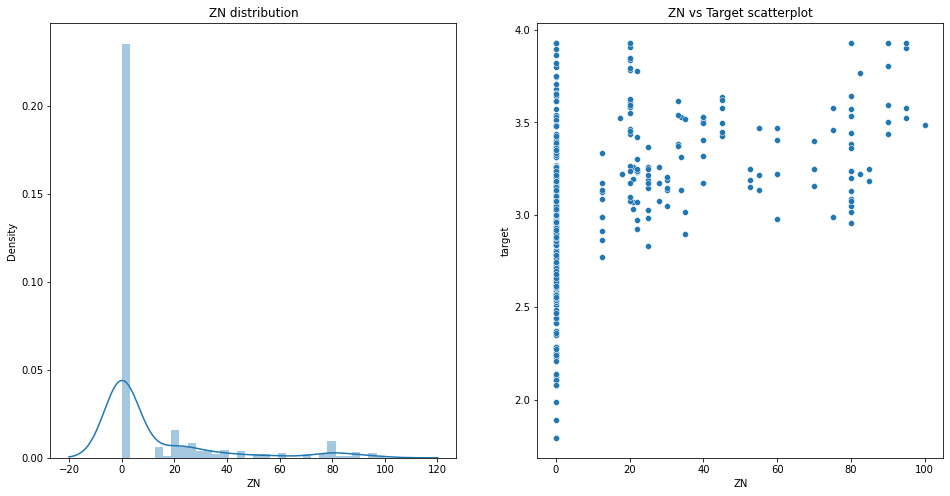

In [571]:
# ZN
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['ZN'], ax = ax[0])
sns.scatterplot(data = data, x = 'ZN', y = 'target', ax = ax[1])
ax[0].set_title('ZN distribution')
ax[1].set_title('ZN vs Target scatterplot')

Text(0.5, 1.0, 'ZN vs Target scatterplot')

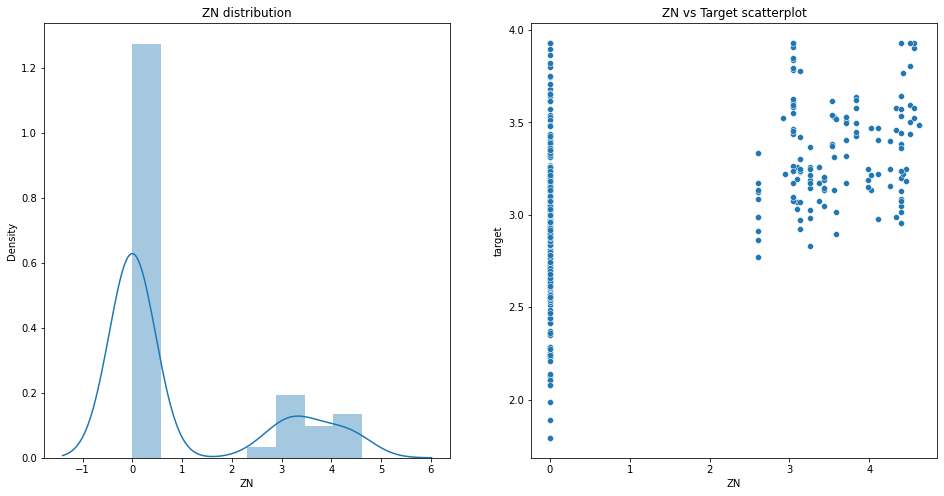

In [572]:
# ZN또한 log를 씌워준다.
data['ZN'] = data['ZN'].apply(lambda x: np.log1p(x))

# ZN
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['ZN'], ax = ax[0])
sns.scatterplot(data = data, x = 'ZN', y = 'target', ax = ax[1])
ax[0].set_title('ZN distribution')
ax[1].set_title('ZN vs Target scatterplot')

Text(0.5, 1.0, 'CHAS vs Target barplot')

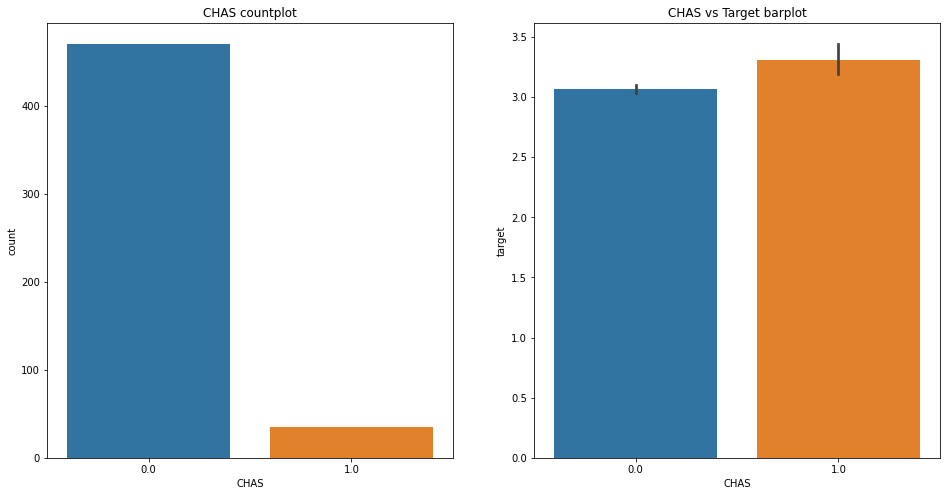

In [573]:
# CHAS # 더미화 시켜줄 것
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.countplot(data['CHAS'], ax = ax[0])
sns.barplot(data = data, x = 'CHAS', y = 'target', ax = ax[1])
ax[0].set_title('CHAS countplot')
ax[1].set_title('CHAS vs Target barplot')

In [574]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

Text(0.5, 1.0, 'NOX vs Target scatterplot')

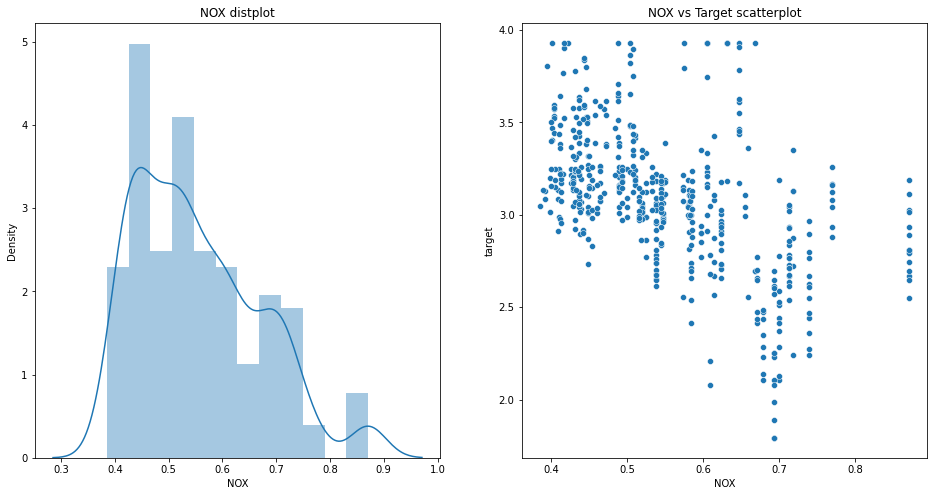

In [575]:
# NOX
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['NOX'], ax = ax[0])
sns.scatterplot(data = data, x = 'NOX', y = 'target', ax = ax[1])
ax[0].set_title('NOX distplot')
ax[1].set_title('NOX vs Target scatterplot')

Text(0.5, 1.0, 'RM vs Target scatterplot')

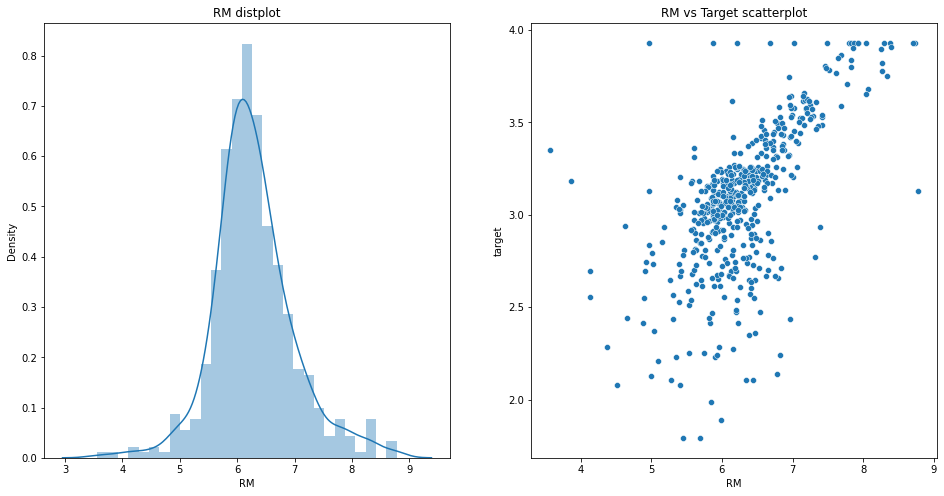

In [576]:
# RM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['RM'], ax = ax[0])
sns.scatterplot(data = data, x = 'RM', y = 'target', ax = ax[1])
ax[0].set_title('RM distplot')
ax[1].set_title('RM vs Target scatterplot')

Text(0.5, 1.0, 'AGE vs Target scatterplot')

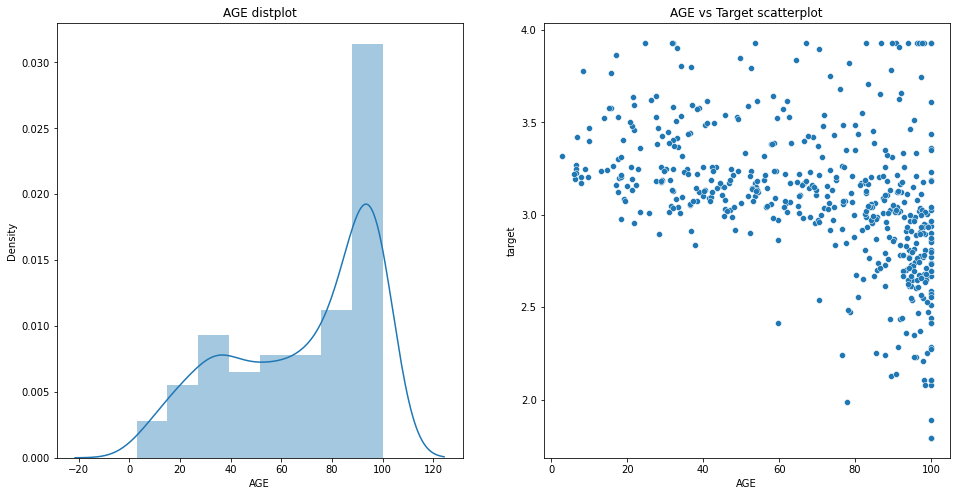

In [577]:
# AGE
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['AGE'], ax = ax[0])
sns.scatterplot(data = data, x = 'AGE', y = 'target', ax = ax[1])
ax[0].set_title('AGE distplot')
ax[1].set_title('AGE vs Target scatterplot')

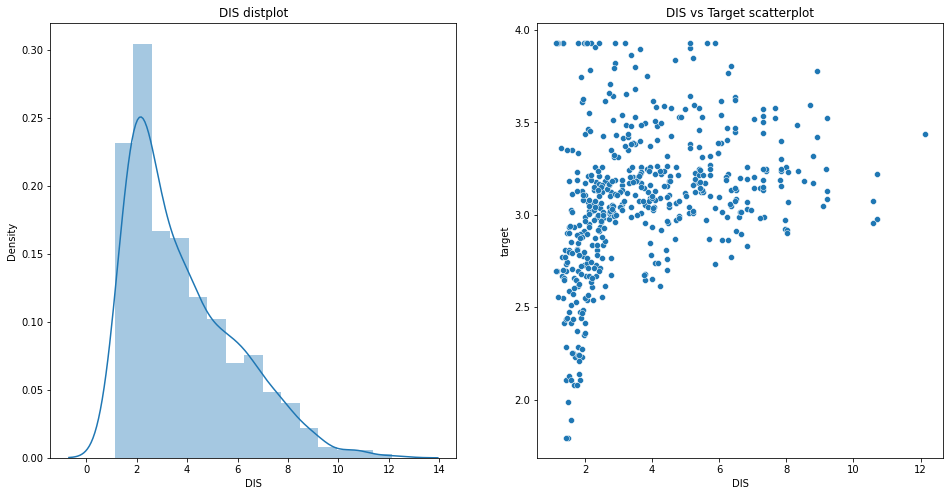

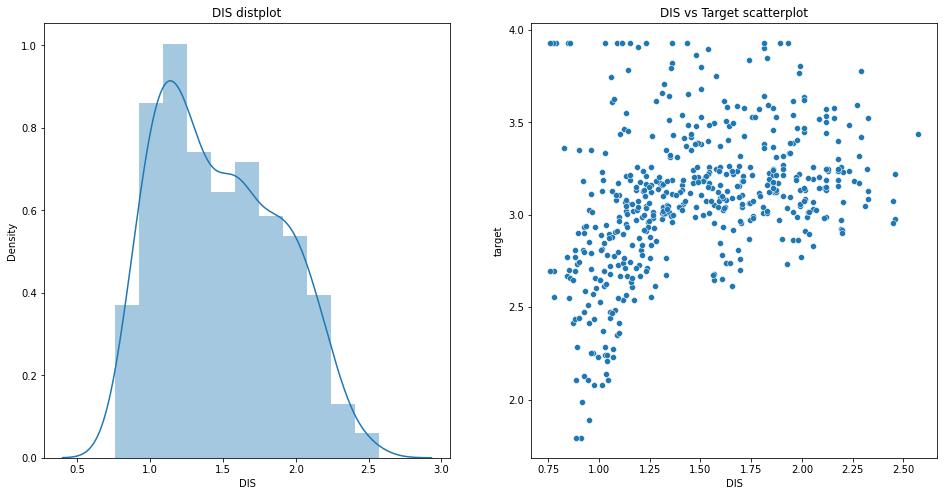

In [578]:
# DIS
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['DIS'], ax = ax[0])
sns.scatterplot(data = data, x = 'DIS', y = 'target', ax = ax[1])
ax[0].set_title('DIS distplot')
ax[1].set_title('DIS vs Target scatterplot')
plt.show()
# log 씌워주기
data['DIS'] = data['DIS'].apply(lambda x: np.log1p(x))

# 다시 그래프 그려주기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['DIS'], ax = ax[0])
sns.scatterplot(data = data, x = 'DIS', y = 'target', ax = ax[1])
ax[0].set_title('DIS distplot')
ax[1].set_title('DIS vs Target scatterplot')
plt.show()

In [579]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

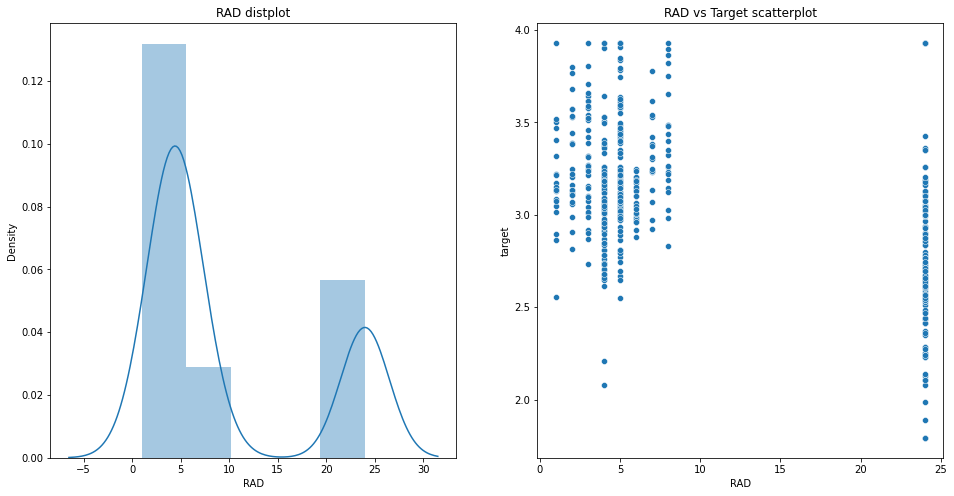

In [580]:
# RAD
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['RAD'], ax = ax[0])
sns.scatterplot(data = data, x = 'RAD', y = 'target', ax = ax[1])
ax[0].set_title('RAD distplot')
ax[1].set_title('RAD vs Target scatterplot')
plt.show()

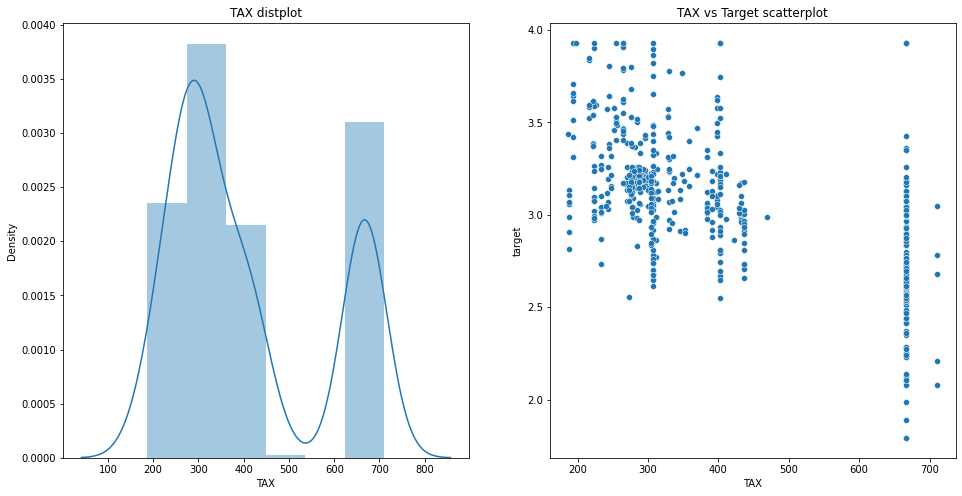

In [581]:
# TAX
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['TAX'], ax = ax[0])
sns.scatterplot(data = data, x = 'TAX', y = 'target', ax = ax[1])
ax[0].set_title('TAX distplot')
ax[1].set_title('TAX vs Target scatterplot')
plt.show()

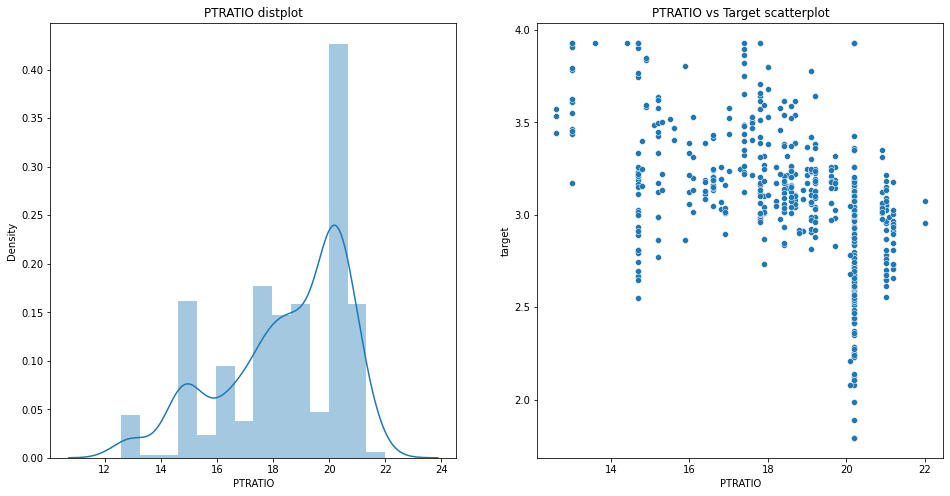

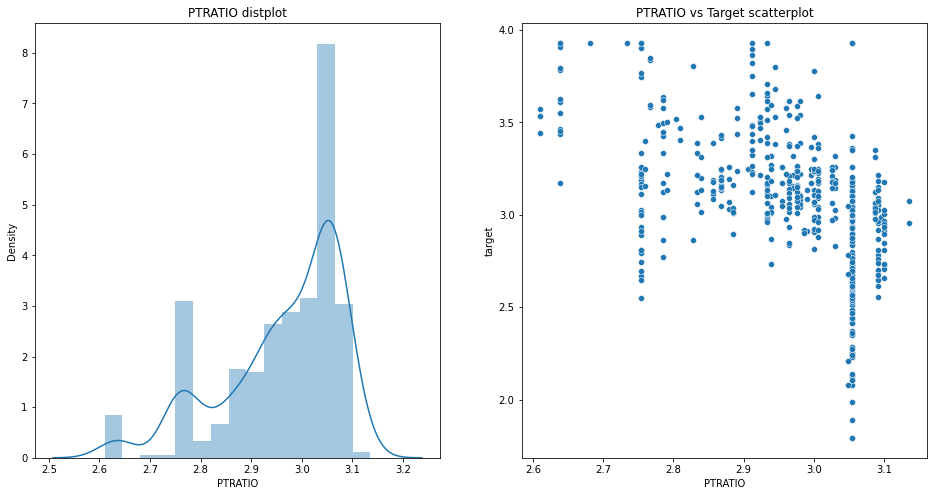

In [582]:
# PTRATIO
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['PTRATIO'], ax = ax[0])
sns.scatterplot(data = data, x = 'PTRATIO', y = 'target', ax = ax[1])
ax[0].set_title('PTRATIO distplot')
ax[1].set_title('PTRATIO vs Target scatterplot')
plt.show()

# 로그를 씌워주고 분석을 진행한다.
data['PTRATIO'] = data['PTRATIO'].apply(lambda x: np.log1p(x))

# 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['PTRATIO'], ax = ax[0])
sns.scatterplot(data = data, x = 'PTRATIO', y = 'target', ax = ax[1])
ax[0].set_title('PTRATIO distplot')
ax[1].set_title('PTRATIO vs Target scatterplot')
plt.show()

In [583]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

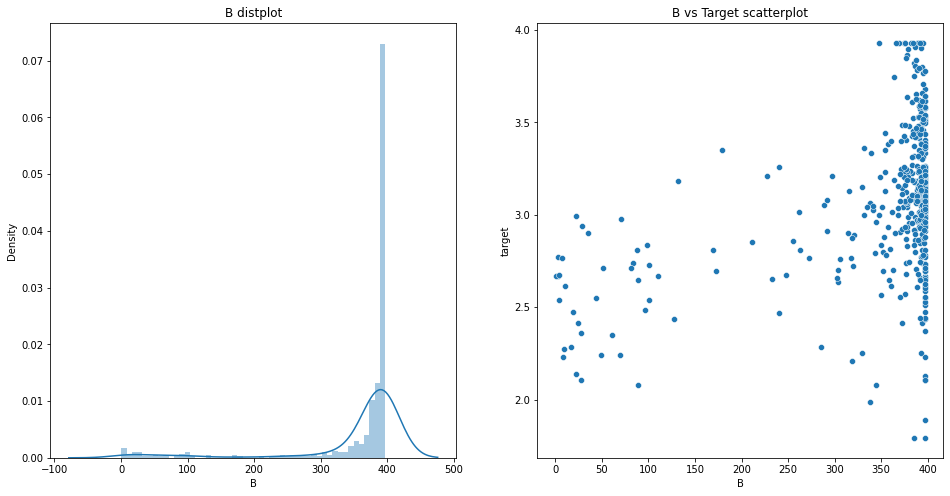

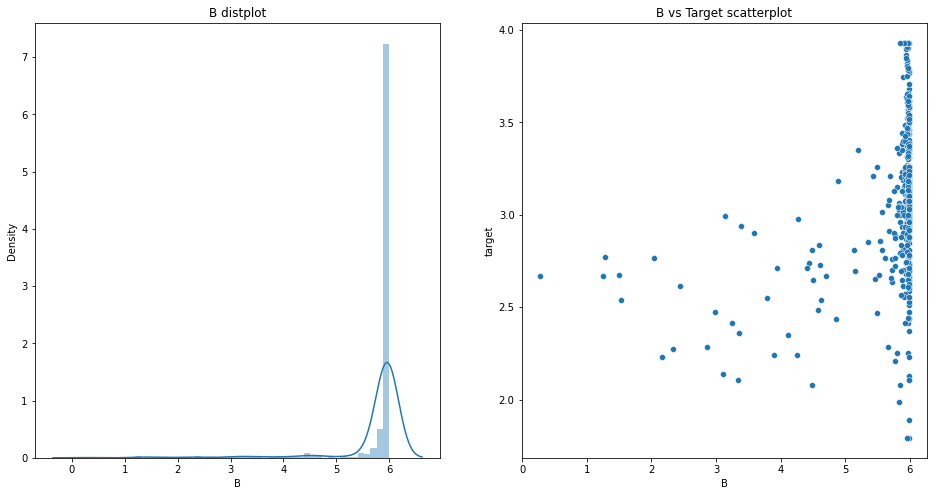

In [584]:
# B
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['B'], ax = ax[0])
sns.scatterplot(data = data, x = 'B', y = 'target', ax = ax[1])
ax[0].set_title('B distplot')
ax[1].set_title('B vs Target scatterplot')
plt.show()

# log를 씌워준다.
data['B'] = data['B'].apply(lambda x: np.log1p(x))

# 다시 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['B'], ax = ax[0])
sns.scatterplot(data = data, x = 'B', y = 'target', ax = ax[1])
ax[0].set_title('B distplot')
ax[1].set_title('B vs Target scatterplot')
plt.show()

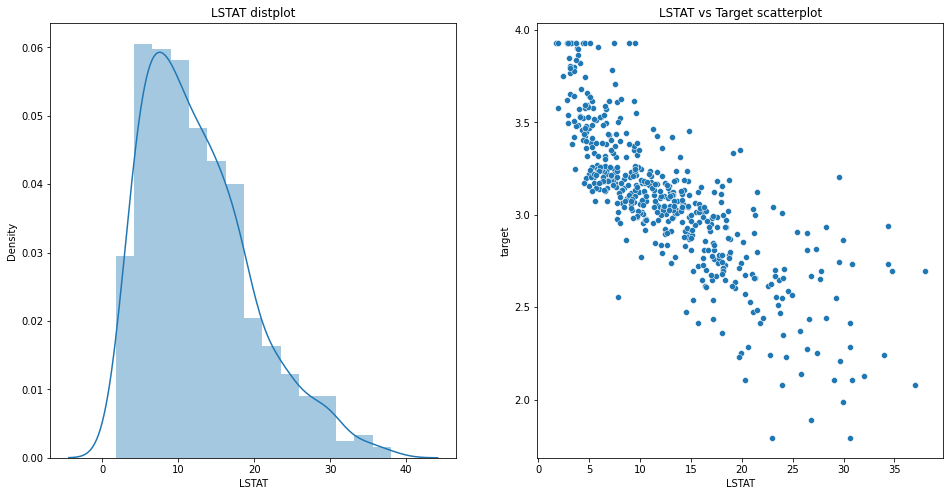

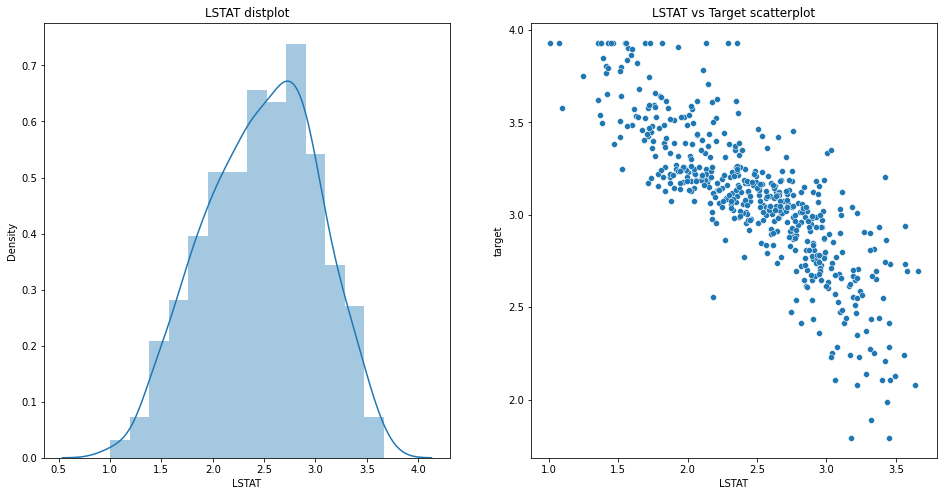

In [585]:
# LSTAT
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['LSTAT'], ax = ax[0])
sns.scatterplot(data = data, x = 'LSTAT', y = 'target', ax = ax[1])
ax[0].set_title('LSTAT distplot')
ax[1].set_title('LSTAT vs Target scatterplot')
plt.show()

# log를 씌워준다.
data['LSTAT'] = data['LSTAT'].apply(lambda x:np.log1p(x))

# 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['LSTAT'], ax = ax[0])
sns.scatterplot(data = data, x = 'LSTAT', y = 'target', ax = ax[1])
ax[0].set_title('LSTAT distplot')
ax[1].set_title('LSTAT vs Target scatterplot')
plt.show()

# statsmodel

In [586]:
import statsmodels.api as sm
X = data.drop('target', axis = 1)
y = data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              7564.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):                        0.00
Time:                        03:51:04   Log-Likelihood:                          49.025
No. Observations:                 506   AIC:                                     -72.05
Df Residuals:                     493   BIC:                                     -17.11
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Modeling

In [587]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data['target'], test_size = 0.2, random_state = 42)

models = {'lr':LinearRegression(), 'ridge':Ridge(), 'lasso':Lasso(),'Elastic':ElasticNet()}
model_rmse = {}
for j,i in models.items():
  model = i
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred = np.exp(y_pred) - 1
  final_y = y_test.copy()
  final_y = np.exp(final_y)-1

  RMSE = mean_squared_error(final_y, y_pred)**0.5
  model_rmse[f'{j}'] = RMSE

print(model_rmse)

{'lr': 4.068527248638521, 'ridge': 4.112920179487871, 'lasso': 7.15533716498366, 'Elastic': 7.077487752024072}


# Kaggle Titanic

In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
train = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/test.csv')

print(train.shape, test.shape)

(891, 12) (418, 11)


0    549
1    342
Name: Survived, dtype: int64


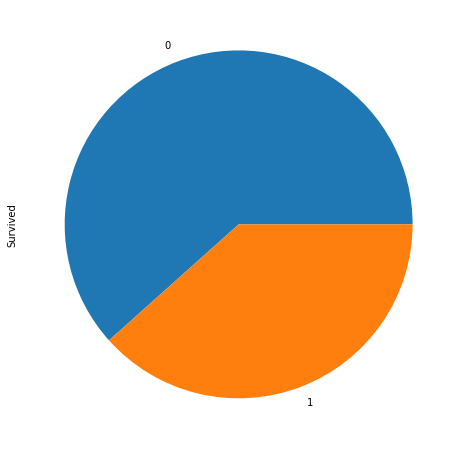

In [589]:
# 종속변수 확인해보기
print(train['Survived'].value_counts())
train['Survived'].value_counts().plot(kind = 'pie', figsize = (16,8))

In [590]:
# Age와 Cabin Embarked의 결측치가 확인 되었다.
print('train 결측치 확인',train.isnull().sum())
print('test 결측치 확인', test.isnull().sum())

train 결측치 확인 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
test 결측치 확인 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [591]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

# categorical feature

In [592]:
# Name
train['Name'] = train['Name'].apply(lambda x: x.split()[1])
train['Name'] = train['Name'].apply(lambda x: x.replace('.',''))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


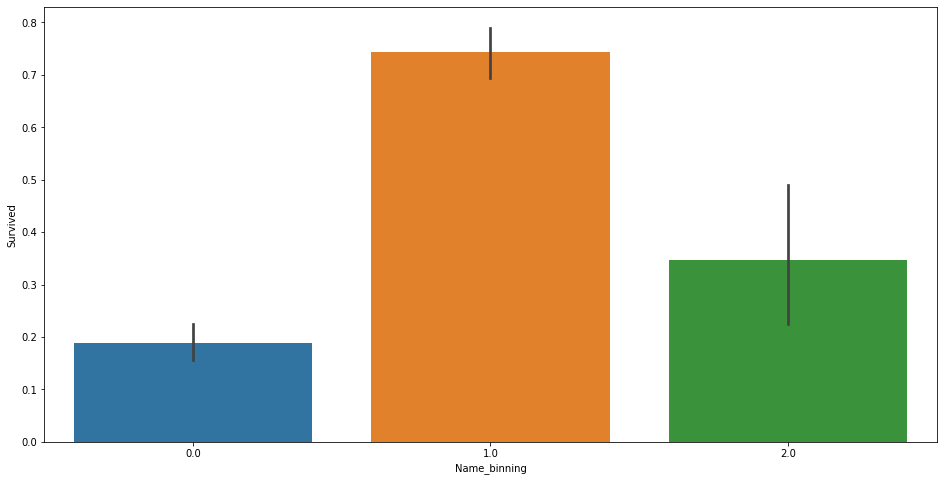

In [593]:
# binning을 해주기
train.loc[(train['Name'] == 'Mr') | (train['Name'] == 'Master'), 'Name_binning'] = 0
train.loc[(train['Name'] == 'Miss') | (train['Name'] == 'Mrs') | (train['Name'] == 'Miss'), 'Name_binning'] = 1
train['Name_binning'] = train['Name_binning'].fillna(2)

# binning해준 결과를 데이터로 살펴보기
# 데이터별로 확연한 차이가 있음을 보여준다.
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'Name_binning', y = 'Survived')

3    491
1    216
2    184
Name: Pclass, dtype: int64 male      577
female    314
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Sex vs Survived')

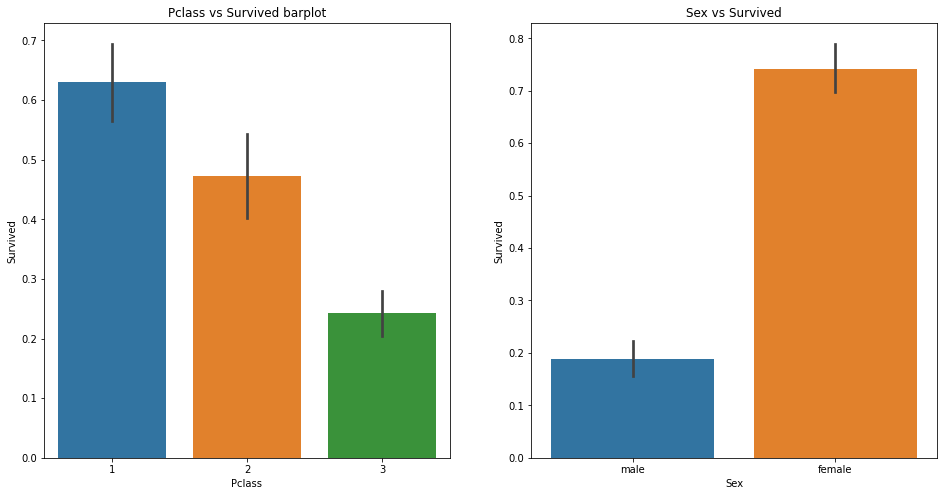

In [594]:
# column을 하나하나 살펴보기
# Pclass와 Sex는 라벨인코더 이후에 더미화를 해주도록 하자.
print(train['Pclass'].value_counts(), train['Sex'].value_counts())
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'Pclass', y = 'Survived', ax = ax[0])
sns.barplot(data = train, x = 'Sex', y = 'Survived', ax = ax[1])
ax[0].set_title('Pclass vs Survived barplot')
ax[1].set_title('Sex vs Survived')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Text(0.5, 1.0, 'Parch vs Survived barplot')

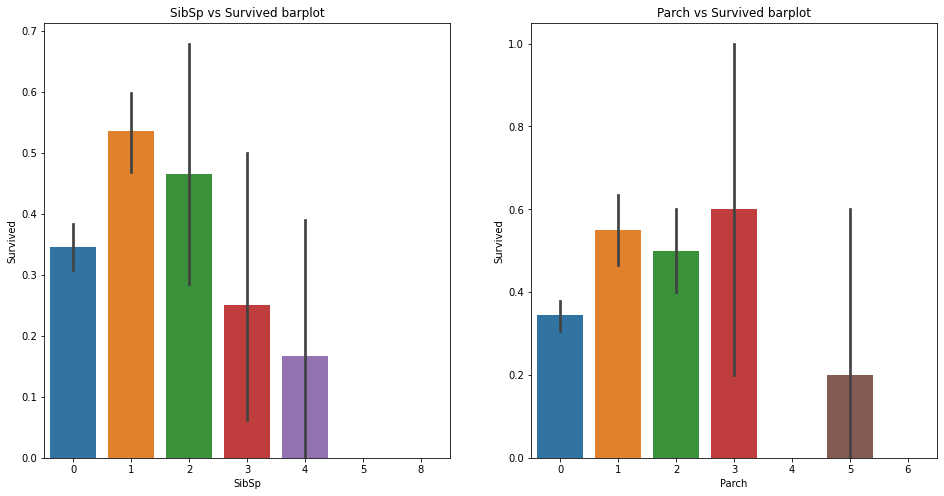

In [595]:
# SibSp, Parch
print(train['SibSp'].value_counts(), train['Parch'].value_counts())
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'SibSp', y = 'Survived', ax = ax[0])
sns.barplot(data = train, x = 'Parch', y = 'Survived', ax = ax[1])
ax[0].set_title('SibSp vs Survived barplot')
ax[1].set_title('Parch vs Survived barplot')

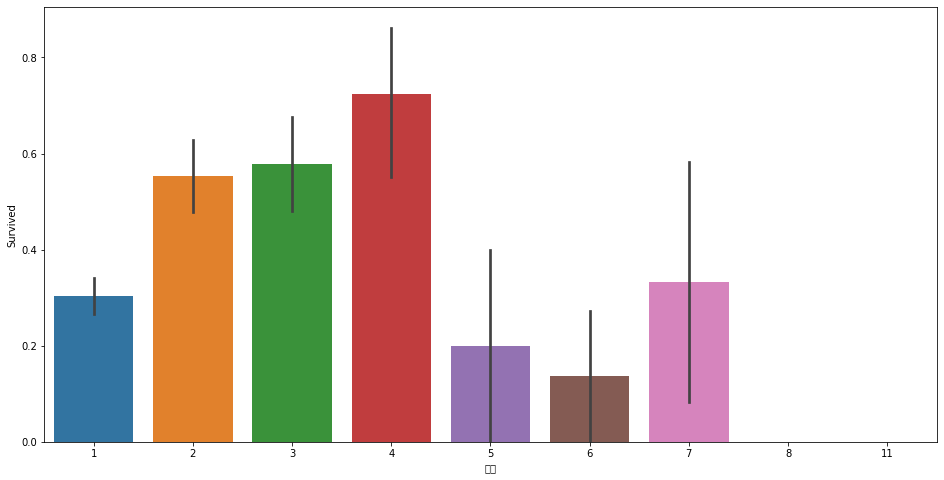

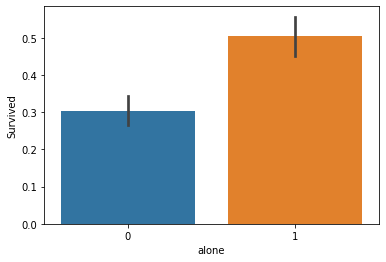

In [596]:
# 가족의 수 확인해보기
train_가족 = train['SibSp'] + train['Parch'] +1
test_가족 = test['SibSp'] + test['Parch'] + 1
train['가족'] = train_가족
test['가족'] = test_가족

plt.figure(figsize = (16,8))
sns.barplot(data = train, x = '가족', y = 'Survived')
plt.show()

# 가족이 늘어날 수록 생존자가 높다고 판단하지 않기 때문에 혼자 온 사람과 혼자 오지 않은 사람으로 alone변수를 만들어 준다.
train['alone'] = train['가족'].apply(lambda x:1 if x > 1 else 0)
test['alone'] = test['가족'].apply(lambda x:1 if x > 1 else 0)

# alone을 가지고 그래프 그려보기
sns.barplot(data = train, x = 'alone', y = 'Survived')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


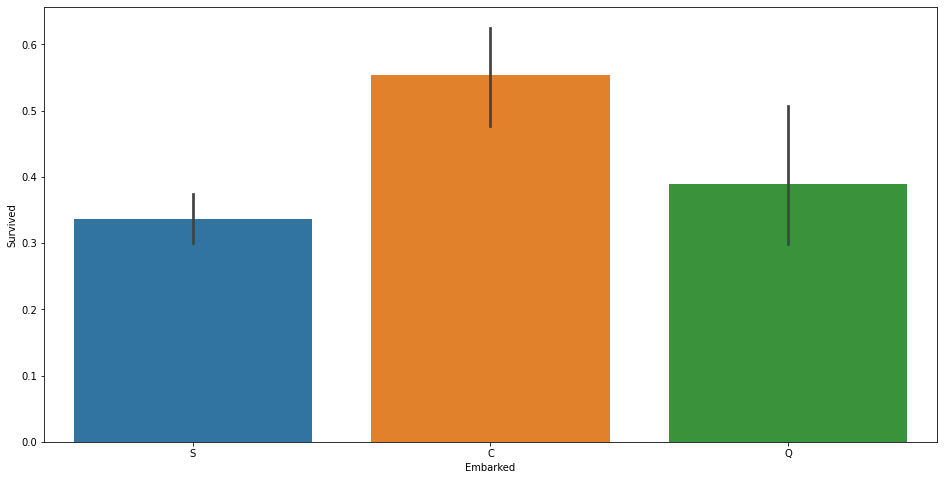

In [597]:
# Embarked
print(train['Embarked'].value_counts())
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'Embarked', y = 'Survived')

# 결측치는 가장 많은 것으로 채우기로 하자.
train['Embarked'] = train['Embarked'].fillna('C')

# numerical feature

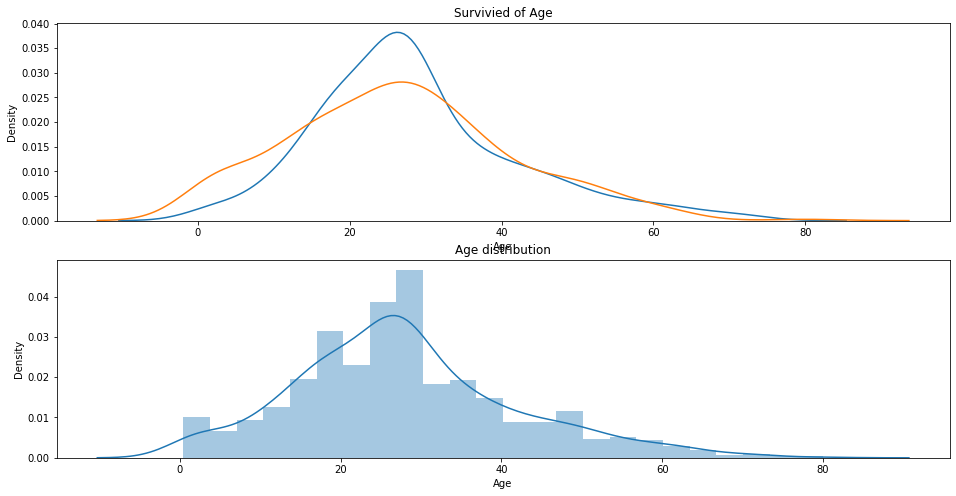

In [598]:
train['Age'] = train['Age'].fillna(-1)
test['Age'] = test['Age'].fillna(-1)

# train 결측치 채워주기
for i in train.index:
  if train.loc[i,'Age'] == -1:
    if train.loc[i,'Embarked'] == 'S':
      train.loc[i, 'Age'] = train[train['Embarked'] == 'S']['Age'].mean()
    elif train.loc[i,'Embarked'] == 'P':
      train.loc[i,'Age'] = train[train['Embarked'] == 'P']['Age'].mean()
    else:
      train.loc[i,'Age'] = train[train['Embarked'] == 'Q']['Age'].mean()

# Facet으로 그래프 그리기
fig, ax = plt.subplots(nrows =2,figsize = (16,8))
sns.distplot(train[train['Survived'] == 0]['Age'], ax = ax[0], hist = False)
sns.distplot(train[train['Survived'] == 1]['Age'], ax = ax[0], hist = False)
ax[0].set_title('Survivied of Age')

sns.distplot(train['Age'], ax = ax[1])
ax[1].set_title('Age distribution')

# 16,32,42,59로 나눠보자.
train.loc[train['Age'] <= 16,'Age_binning'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_binning'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 59), 'Age_binning'] = 2
train.loc[train['Age'] > 59,'Age_binning'] = 3

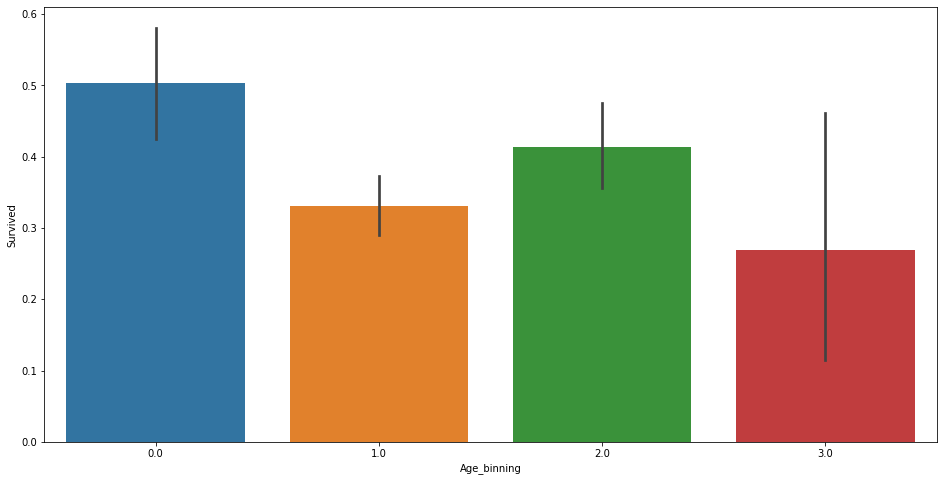

In [599]:
# 더미화를 시켜서 데이터를 분석해 주기로 하자.
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'Age_binning', y = 'Survived')

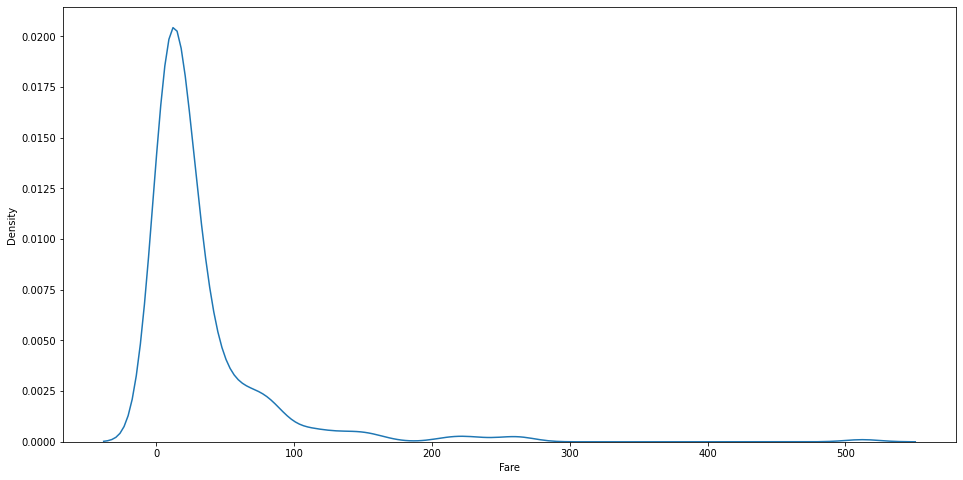

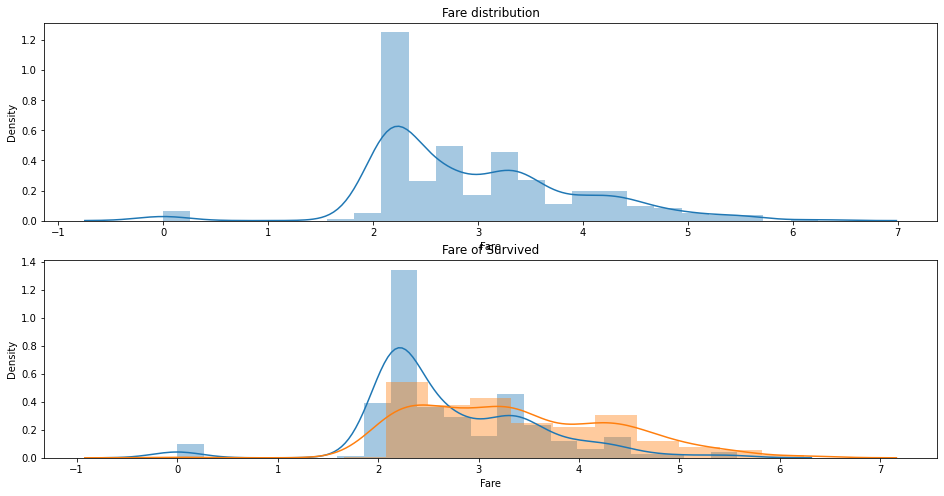

Text(0.5, 1.0, 'Fare_binning vs Survived')

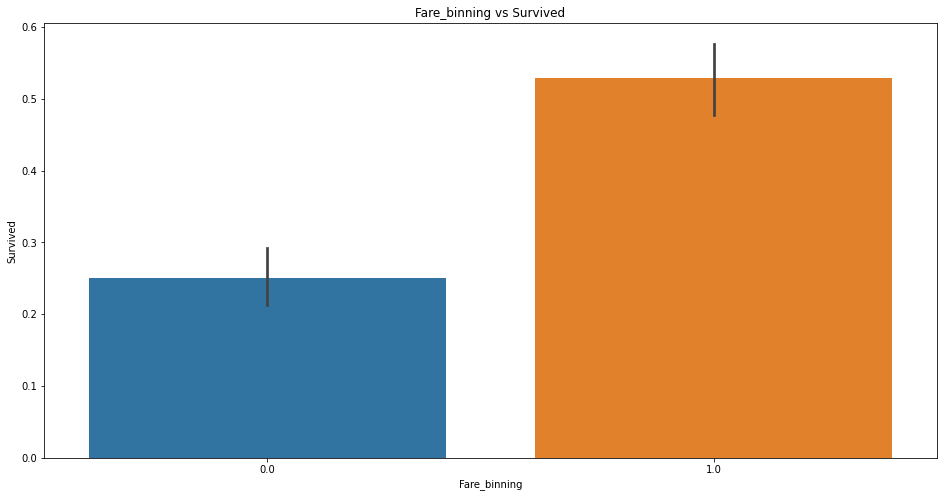

In [600]:
# Fare
plt.figure(figsize =(16,8))
sns.kdeplot(train['Fare'])
plt.show()

# 정규화를 위해서 log 씌우기
train['Fare'] = train['Fare'].apply(lambda x: np.log1p(x))
test['Fare'] = test['Fare'].apply(lambda x:np.log1p(x))

# 그래프 다시 그려보기
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.distplot(train['Fare'], ax = ax[0])
ax[0].set_title('Fare distribution')

sns.distplot(train[train['Survived'] == 0]['Fare'], ax = ax[1])
sns.distplot(train[train['Survived'] == 1]['Fare'], ax = ax[1])
ax[1].set_title('Fare of Survived')
plt.show()

# Fare binning을 높은것 낮은것으로 나눠서 해주도록 하자.
train.loc[train['Fare'] <= 2.8, 'Fare_binning'] = 0
train.loc[train['Fare'] > 2.8,'Fare_binning'] = 1

# Fare binning으로 데이터 별로 차이가 있는지 확인해 주자.
plt.figure(figsize =(16,8))
sns.barplot(data = train, x = 'Fare_binning', y = 'Survived')
plt.title('Fare_binning vs Survived')

# Modeling

In [601]:
# 모델링을 위한 전처리
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical = ['Pclass','Sex','Embarked']
drop = ['Name','Ticket','Cabin','PassengerId','SibSp','Parch']
# 라벨 인코딩
for i in categorical:  
  train[i] = le.fit_transform(train[i])
  test[i] = le.fit_transform(test[i])

# 필요없는 변수 없애주기
for i in drop:
  train = train.drop(i, axis = 1)
  test = test.drop(i, axis = 1)

In [602]:
# 더미화 시켜주기
train= pd.get_dummies(data = train, columns = ['Pclass','Sex','Embarked','Age_binning','Name_binning','가족'])
# test = pd.get_dummies(data = test, columns = ['Pclass','Sex','Embarked','Age','Fare','가족'])

In [603]:
train

,Survived,Age,Fare,alone,Fare_binning,Pclass_0,Pclass_1,Pclass_2,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Age_binning_0.0,Age_binning_1.0,Age_binning_2.0,Age_binning_3.0,Name_binning_0.0,Name_binning_1.0,Name_binning_2.0,가족_1,가족_2,가족_3,가족_4,가족_5,가족_6,가족_7,가족_8,가족_11
0,0,22.000000,2.110213,1,0.0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1,38.000000,4.280593,1,1.0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1,26.000000,2.188856,0,0.0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,35.000000,3.990834,1,1.0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,35.000000,2.202765,0,0.0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,2.639057,0,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
887,1,19.000000,3.433987,0,1.0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
888,0,29.068928,3.196630,1,1.0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
889,1,26.000000,3.433987,0,1.0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [604]:
train.columns

Index(['Survived', 'Age', 'Fare', 'alone', 'Fare_binning', 'Pclass_0',
       'Pclass_1', 'Pclass_2', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1',
       'Embarked_2', 'Age_binning_0.0', 'Age_binning_1.0', 'Age_binning_2.0',
       'Age_binning_3.0', 'Name_binning_0.0', 'Name_binning_1.0',
       'Name_binning_2.0', '가족_1', '가족_2', '가족_3', '가족_4', '가족_5', '가족_6',
       '가족_7', '가족_8', '가족_11'],
      dtype='object')

In [605]:
!pip install catboost

In [606]:
!pip install vecstack

In [607]:
# modeling 해주기
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from vecstack import stacking

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.2, random_state = 42)


xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
rfg = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
cat = CatBoostClassifier(random_state = 42)

models = {'xgb':xgb, 'lgb':lgb, 'rfg':rfg, 'ada':ada, 'cat':cat}
model_accuracy = {}

for i, j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = np.mean(y_pred == y_test)

  model_accuracy[f'{i}'] = accuracy

print(model_accuracy)

Learning rate set to 0.008911
0:	learn: 0.6872261	total: 1.9ms	remaining: 1.9s
1:	learn: 0.6813930	total: 3.87ms	remaining: 1.93s
2:	learn: 0.6769629	total: 5.81ms	remaining: 1.93s
3:	learn: 0.6711014	total: 7.74ms	remaining: 1.93s
4:	learn: 0.6648710	total: 9.58ms	remaining: 1.91s
5:	learn: 0.6593367	total: 11.4ms	remaining: 1.89s
6:	learn: 0.6545528	total: 12.8ms	remaining: 1.81s
7:	learn: 0.6495891	total: 14.6ms	remaining: 1.81s
8:	learn: 0.6451974	total: 16.9ms	remaining: 1.86s
9:	learn: 0.6396400	total: 18.8ms	remaining: 1.86s
10:	learn: 0.6346554	total: 20.6ms	remaining: 1.85s
11:	learn: 0.6295274	total: 22.8ms	remaining: 1.88s
12:	learn: 0.6258952	total: 24.7ms	remaining: 1.87s
13:	learn: 0.6212183	total: 26.5ms	remaining: 1.86s
14:	learn: 0.6164009	total: 28.3ms	remaining: 1.86s
15:	learn: 0.6120786	total: 30.1ms	remaining: 1.85s
16:	learn: 0.6075991	total: 32ms	remaining: 1.85s
17:	learn: 0.6037885	total: 33.9ms	remaining: 1.85s
18:	learn: 0.5995877	total: 35.7ms	remaining: 1.

In [ ]:
# stacking
models = [XGBClassifier(random_state = 42),LGBMClassifier(random_state = 42),RandomForestClassifier(random_state = 42),AdaBoostClassifier(random_state = 42),CatBoostClassifier(random_state = 42)]
S_train, S_test = stacking(models, X_train, y_train, X_test, regression = False, metric = ['acc'], n_folds = 3)

rfg = RandomForestClassifier()
rfg.fit(S_train, y_train)
stack_y_pred = rfg.predict(S_test)

np.mean(stack_y_pred == y_test)

In [ ]:
from sklearn.ensemble import VotingClassifier

xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
rfg = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
cat = CatBoostClassifier(random_state = 42)

asd = VotingClassifier([('xgb',xgb),('lgb',lgb),('rfg',rfg),('ada',ada),('cat',cat)])
model = asd.fit(X_train, y_train)
vot_y_pred = model.predict(X_test)

np.mean(vot_y_pred == y_test)

# Voting이 제일 잘맞았다

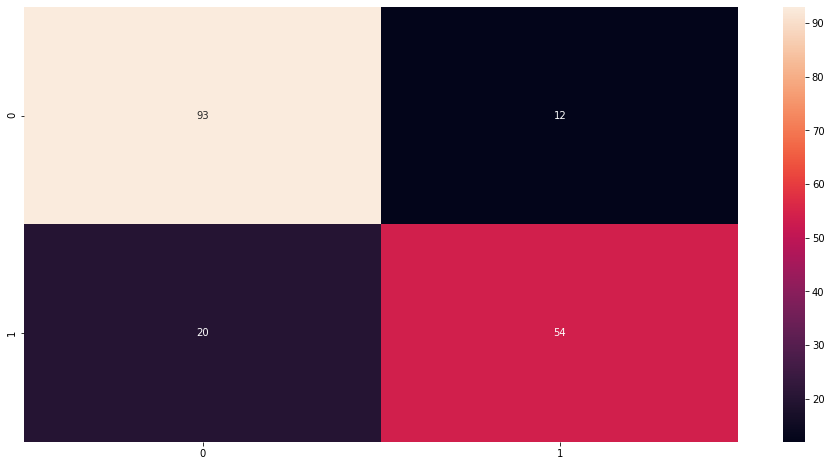

In [613]:
# 우리는 평가지표를 통해서 데이터를 살펴보자.
# 과적합이 보이지도 않고 좋은 모델이 생성된 것 같다.
from sklearn.metrics import confusion_matrix
corr = confusion_matrix(y_test, vot_y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(corr, annot = True)